In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, ShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from IPython.display import display
import sklearn.cross_validation as cv

/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
X = pd.read_csv('~/projects/capstone/model_selection/pro3_Data.csv')
y = pd.read_csv('~/projects/capstone/model_selection/pro3_y.csv', header= None)
y = y[0]

In [7]:
import sklearn
import sklearn.model_selection

X_train, X_test, y_train, y_test= sklearn.model_selection.train_test_split(X, y)

### Bagging Ensembles:

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Bagging Classifier:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.912984364378


In [6]:
#Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.89239584345


### RandomForests:

In [7]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [8]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.907254540157


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

In [10]:
print(accuracy_score(y_test, y_pred_rf))

0.905603573856


In [11]:
#Out-of-Bag Evaluation:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.912563529830695

In [20]:
bag_clf.oob_decision_function_

array([[ 0.99441341,  0.00558659],
       [ 0.49230769,  0.50769231],
       [ 1.        ,  0.        ],
       ..., 
       [ 0.87709497,  0.12290503],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ]])

In [13]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.91356705836651453

In [12]:
##Switching to PROJECT5
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)



In [2]:

# perform model evaluation
# build model evaluation function
from __future__ import print_function
import sklearn.metrics
import time

def evaluate_model(clf):
    """Scores a model using log loss with the created train and test sets."""
    start = time.time()
    clf.fit(X_train, y_train)
    train_loss = sklearn.metrics.log_loss(y_train, clf.predict_proba(X_train))
    test_loss = sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))
    print("Train score:", train_loss)
    print("Test score:", test_loss)
    print("Total time:", time.time() - start)
    print()
    return test_loss

In [15]:
evaluate_model(rf_clf)

Train score: 0.219657183756
Test score: 0.219432366798
Total time: 7.37145590782



0.2194323667980646

/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


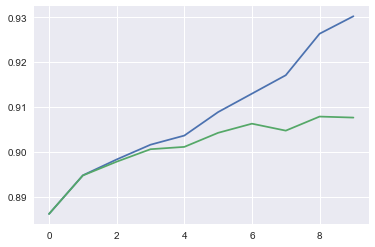

In [16]:
import sklearn.cross_validation
import numpy as np
import sklearn.learning_curve
import matplotlib.pyplot as plt
%matplotlib inline
max_depths = [1,2,3,4,5,6,7,8,9,10] # Insert max_depth range
train_scores, test_scores = sklearn.learning_curve.validation_curve(
    RandomForestClassifier(), X_train, y_train, 'max_depth', max_depths)
plt.plot(np.mean(train_scores, axis=1), label='Train')
plt.plot(np.mean(test_scores, axis=1), label='Test')
# based on the plot the max_depth ~5

In [17]:
# grid search for the best params
from sklearn.grid_search import GridSearchCV
params = {'class_weight' : [{1:4},{1:3},{1:2}]}
grid = GridSearchCV(RandomForestClassifier(max_depth=4, n_estimators = 1000,max_features = 'auto'), 
                    params, scoring='log_loss')
evaluate_model(grid)

/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake

Train score: 0.254908890412
Test score: 0.255525600991
Total time: 123.918265104



0.25552560099122856

In [18]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={1: 2}, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [20]:
rf_grid = grid.best_estimator_

In [21]:
rf_grid.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 2}, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [22]:
from sklearn.metrics import classification_report
rf_grid.score(X_train, y_train)

0.90485902042666144

### Classification Reports:

In [23]:
from sklearn.metrics import classification_report
rf_pred_train= rf_grid.predict(X_train)
target_names = ['Class_No', 'Class_Yes']
print (classification_report(y_train,rf_pred_train, target_names=target_names))

             precision    recall  f1-score   support

   Class_No       0.92      0.97      0.95     27373
  Class_Yes       0.64      0.39      0.48      3518

avg / total       0.89      0.90      0.89     30891



In [24]:
rf_pred_Test = rf_grid.predict(X_test)
target_names = ['Class_No', 'Class_Yes']
print (classification_report(y_test,rf_pred_Test, target_names = target_names))

             precision    recall  f1-score   support

   Class_No       0.93      0.97      0.95      9175
  Class_Yes       0.61      0.38      0.47      1122

avg / total       0.89      0.91      0.90     10297



### Feature Importance:

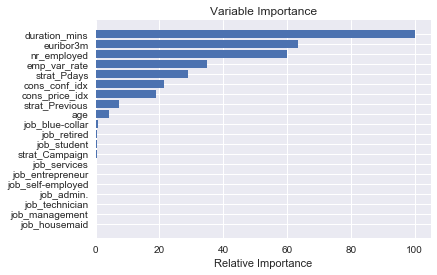

In [25]:
feature_importance = rf_grid.feature_importances_

#make importances relative to max importance
feature_importance = 100.0*(feature_importance / feature_importance.max())
show_features = feature_importance[:20] #top twenty
sorted_idx =np.argsort(show_features)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(pos, show_features[sorted_idx], align='center')
plt.yticks(pos,X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Rerun model with only features of relative importance:

In [29]:
feature_selection = ['duration_mins', 'nr_employed', 'euribor3m', 'emp_var_rate', 'strat_Pdays', 'cons_conf_idx',
                     'cons_price_idx', 'strat_Previous', 'age', 'job_blue-collar', 'job_retired']

subX = X[feature_selection].values
suby = y.values

print (subX.shape)
print (suby.shape)

(41188, 11)
(41188,)


In [30]:
import sklearn
import sklearn.model_selection

X_train, X_test, y_train, y_test= sklearn.model_selection.train_test_split(subX, suby)

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfsub_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rfsub_clf.fit(X_train, y_train)

y_pred_rf = rfsub_clf.predict(X_test)

In [33]:
print(accuracy_score(y_test, y_pred_rf))

0.907837234146


In [34]:
evaluate_model(rfsub_clf)

Train score: 0.203271700338
Test score: 0.209757879579
Total time: 6.62048006058



0.20975787957925321

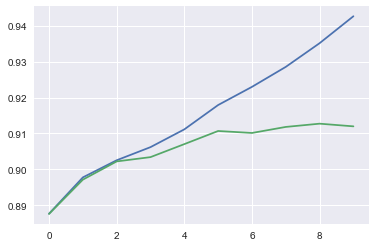

In [35]:
import sklearn.cross_validation
import numpy as np
import sklearn.learning_curve
import matplotlib.pyplot as plt
%matplotlib inline
max_depths = [1,2,3,4,5,6,7,8,9,10] # FILL IN
train_scores, test_scores = sklearn.learning_curve.validation_curve(
    RandomForestClassifier(), X_train, y_train, 'max_depth', max_depths)
plt.plot(np.mean(train_scores, axis=1), label='Train')
plt.plot(np.mean(test_scores, axis=1), label='Test')
# based on the plot the max_depth ~5

In [36]:
# grid search for the best params
from sklearn.grid_search import GridSearchCV
params = {'class_weight' : [{1:4},{1:3},{1:2}]}
grid = GridSearchCV(RandomForestClassifier(max_depth=4, n_estimators = 1000,max_features = 'auto'), 
                    params, scoring='log_loss')


In [37]:
evaluate_model(grid)

/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: Dep

Train score: 0.225182512869
Test score: 0.230492978658
Total time: 114.499058008



0.23049297865783511

In [38]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={1: 2}, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [40]:
rfsubmod = grid.best_estimator_
rfsubmod.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 2}, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

## Sub-model Classification Reports:

In [42]:
from sklearn.metrics import classification_report
rf_pred_train= rfsubmod.predict(X_train)
target_names = ['Class_No', 'Class_Yes']
print (classification_report(y_train,rf_pred_train, target_names=target_names))

             precision    recall  f1-score   support

   Class_No       0.94      0.96      0.95     27410
  Class_Yes       0.61      0.50      0.55      3481

avg / total       0.90      0.91      0.90     30891



In [43]:
rf_pred_Test = rfsubmod.predict(X_test)
target_names = ['Class_No', 'Class_Yes']
print (classification_report(y_test,rf_pred_Test, target_names = target_names))

             precision    recall  f1-score   support

   Class_No       0.93      0.96      0.95      9138
  Class_Yes       0.58      0.47      0.52      1159

avg / total       0.89      0.90      0.90     10297



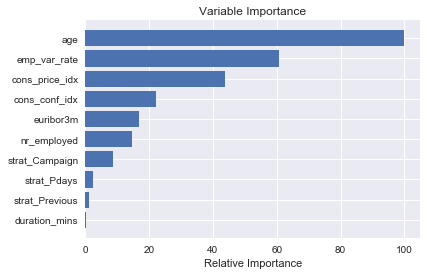

In [44]:
feature_importance = rfsubmod.feature_importances_

#make importances relative to max importance
feature_importance = 100.0*(feature_importance / feature_importance.max())
show_features = feature_importance[:10] #top ten
sorted_idx =np.argsort(show_features)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(pos, show_features[sorted_idx], align='center')
plt.yticks(pos,X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()